In [1]:
# # For Colab Environment
# !pip install -q tflite_model_maker

# For conda AWS environment 
!pip install -q tflite-model-maker
!pip install -q pycocotools

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
shap 0.40.0 requires packaging>20.9, but you have packaging 20.9 which is incompatible.
pytoolconfig 1.2.4 requires packaging>=22.0, but you have packaging 20.9 which is incompatible.
jupyterlab 3.3.4 requires jupyter-server~=1.4, but you have jupyter-server 2.0.6 which is incompatible.
jupyterlab-server 2.18.0 requires jsonschema>=4.17.3, but you have jsonschema 3.2.0 which is incompatible.
jupyterlab-server 2.18.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
docker 6.0.1 requires urllib3>=1.26.0, but you have urllib3 1.25.11 which is incompatible.
distributed 2022.11.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.2 which is incompatible.


In [2]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
     

/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a b

In [3]:
# Choose an object detection model archiecture
spec = model_spec.get('efficientdet_lite0')
     



2023-04-27 13:34:49.265244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 13:34:49.265977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 13:34:49.266530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 13:34:49.267057: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-27 13:34:49.267566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [4]:
import os
cwd = os.getcwd()

In [5]:
!curl -L "https://universe.roboflow.com/ds/XRFQn0K808?key=d2eQkYIh5g" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0   2980      0 --:--:-- --:--:-- --:--:--  2989
100  159M  100  159M    0     0  69.6M      0  0:00:02  0:00:02 --:--:-- 94.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/10021_jpg.rf.7128849fe2cc66b160331a2808668009.jpg  
 extracting: test/10021_jpg.rf.7128849fe2cc66b160331a2808668009.xml  
 extracting: test/10041_jpg.rf.158c6a037f86562804ca491c52c7a068.jpg  
 extracting: test/10041_jpg.rf.158c6a037f86562804ca491c52c7a068.xml  
 extracting: test/10054_jpg.rf.9b84a5a0f7bf45cb76fae8853ec9cd05.jpg  
 extracting: test/10054_jpg.rf.9b84a5a0f7bf45cb76fae8853ec9cd05.xml  
 extracting: test/10055_jpg.rf.428aa7d1429c852db92e5f7eb22f0157.jpg  
 extracting: test/10055_jpg.rf.428aa7d1429c852db92e5f7eb22f0157.xml  
 extra

In [6]:
cwd

'/home/ec2-user/SageMaker'

In [7]:
!ls

3_EfficientDet.ipynb  README.dataset.txt   test   valid
lost+found	      README.roboflow.txt  train


In [8]:
# Load the dataset
CLASSES = ['1', '2', '3', '4', '5', '6']
TRAIN_DATASET_PATH = f'{cwd}/train'
VALID_DATASET_PATH = f'{cwd}/valid'
TEST_DATASET_PATH = f'{cwd}/test'

train_data = object_detector.DataLoader.from_pascal_voc(
    TRAIN_DATASET_PATH,
    TRAIN_DATASET_PATH,
    CLASSES
)

val_data = object_detector.DataLoader.from_pascal_voc(
    VALID_DATASET_PATH,
    VALID_DATASET_PATH,
    CLASSES
)

test_data = object_detector.DataLoader.from_pascal_voc(
    TEST_DATASET_PATH,
    TEST_DATASET_PATH,
    CLASSES
)


INFO:tensorflow:Cache will be stored in /tmp/tmppqoqdr1a with prefix filename 7bee435cfee6949ada7cad38d32e815e. Cache_prefix is /tmp/tmppqoqdr1a/7bee435cfee6949ada7cad38d32e815e
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100
INFO:tensorflow:On image 200
INFO:tensorflow:On image 300
INFO:tensorflow:On image 400
INFO:tensorflow:On image 500
INFO:tensorflow:On image 600
INFO:tensorflow:On image 700
INFO:tensorflow:On image 800
INFO:tensorflow:On image 900
INFO:tensorflow:On image 1000
INFO:tensorflow:On image 1100
INFO:tensorflow:On image 1200
INFO:tensorflow:On image 1300
INFO:tensorflow:On image 1400
INFO:tensorflow:On image 1500
INFO:tensorflow:On image 1600
INFO:tensorflow:On image 1700
INFO:tensorflow:On image 1800
INFO:tensorflow:On image 1900
INFO:tensorflow:On image 2000
INFO:tensorflow:On image 2100
INFO:tensorflow:On image 2200
INFO:tensorflow:On image 2300
INFO:tensorflow:On image 2400
INFO:tensorflow:On image 2500
INFO:tensorflow:On image 2600
INFO:tensorflow:On image

In [9]:
# Train the TensorFlow model with the training data
# example https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/object_detection.ipynb
model = object_detector.create(train_data, model_spec=spec, batch_size=64, train_whole_model=True, validation_data=val_data,epochs=350)

INFO:tensorflow:Retraining the models...
Epoch 1/350


2023-04-27 13:36:11.994900: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600


109/109 [==============================] - 175s 691ms/step - det_loss: 1.5338 - cls_loss: 0.8987 - box_loss: 0.0127 - reg_l2_loss: 0.0640 - loss: 1.5978 - learning_rate: 0.0440 - gradient_norm: 1.7946 - val_det_loss: 7.8117 - val_cls_loss: 7.0035 - val_box_loss: 0.0162 - val_reg_l2_loss: 0.0650 - val_loss: 7.8766
Epoch 2/350
109/109 [==============================] - 74s 676ms/step - det_loss: 0.9019 - cls_loss: 0.5217 - box_loss: 0.0076 - reg_l2_loss: 0.0663 - loss: 0.9682 - learning_rate: 0.0800 - gradient_norm: 1.7144 - val_det_loss: 11.4187 - val_cls_loss: 10.4772 - val_box_loss: 0.0188 - val_reg_l2_loss: 0.0674 - val_loss: 11.4861
Epoch 3/350
109/109 [==============================] - 73s 673ms/step - det_loss: 0.7285 - cls_loss: 0.4231 - box_loss: 0.0061 - reg_l2_loss: 0.0681 - loss: 0.7966 - learning_rate: 0.0800 - gradient_norm: 1.3634 - val_det_loss: 1.6805 - val_cls_loss: 1.1093 - val_box_loss: 0.0114 - val_reg_l2_loss: 0.0687 - val_loss: 1.7491
Epoch 4/350
109/109 [=========

In [10]:
model.evaluate(test_data)


16/16 [==============================] - 21s 640ms/step

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(100000, 7)
0/100000
DONE (t=1.13s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=4.88s).
Accumulating evaluation results...
DONE (t=1.13s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.601
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.898
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.650
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.363
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.665
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.515
 Average Recall     (AR) @[ IoU=0.50

{'AP': 0.60079616,
 'AP50': 0.8977304,
 'AP75': 0.6498255,
 'APs': 0.36258405,
 'APm': 0.6646203,
 'APl': 0.8223057,
 'ARmax1': 0.51471955,
 'ARmax10': 0.69415426,
 'ARmax100': 0.72905487,
 'ARs': 0.5721013,
 'ARm': 0.7668191,
 'ARl': 0.8906595,
 'AP_/1': 0.80696654,
 'AP_/2': 0.35335305,
 'AP_/3': 0.5688313,
 'AP_/4': 0.6097171,
 'AP_/5': 0.43184182,
 'AP_/6': 0.8340673}

In [11]:
model.export(export_dir='.')


2023-04-27 21:11:55.839307: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpmbd3l6kb/assets


INFO:tensorflow:Assets written to: /tmp/tmpmbd3l6kb/assets
2023-04-27 21:12:20.412672: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'resample_p7/PartitionedCall' has 1 outputs but the _output_shapes attribute specifies shapes for 3 outputs. Output shapes may be inaccurate.
2023-04-27 21:12:27.128497: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2023-04-27 21:12:27.128536: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2023-04-27 21:12:27.129519: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpmbd3l6kb
2023-04-27 21:12:27.268072: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2023-04-27 21:12:27.268113: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmpmbd3l6kb
2023-04-27 21:12:27.683513: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel

INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpby9vqe3b/labelmap.txt.


INFO:tensorflow:Saving labels in /tmp/tmpby9vqe3b/labelmap.txt.


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [12]:
model.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    multiple                  3234464   
                                                                 
 class_net/class-predict (Se  multiple                 4086      
 parableConv2D)                                                  
                                                                 
 box_net/box-predict (Separa  multiple                 2916      
 bleConv2D)                                                      
                                                                 
Total params: 3,241,466
Trainable params: 3,194,330
Non-trainable params: 47,136
_________________________________________________________________


In [13]:
model.evaluate_tflite('model.tflite', test_data)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


1000/1000 [==============================] - 2152s 2s/step

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(25000, 7)
0/25000
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.73s).
Accumulating evaluation results...
DONE (t=0.46s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.561
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.863
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.596
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.317
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.621
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.504
 Average Recall     (AR) @[ IoU=0.5

{'AP': 0.5610804,
 'AP50': 0.8633995,
 'AP75': 0.5963689,
 'APs': 0.31697324,
 'APm': 0.6210247,
 'APl': 0.7580494,
 'ARmax1': 0.5037748,
 'ARmax10': 0.6251555,
 'ARmax100': 0.6331085,
 'ARs': 0.45045635,
 'ARm': 0.675388,
 'ARl': 0.79143494,
 'AP_/1': 0.78461766,
 'AP_/2': 0.32785246,
 'AP_/3': 0.49801505,
 'AP_/4': 0.56748676,
 'AP_/5': 0.4052063,
 'AP_/6': 0.7833041}

In [15]:
# from google.colab import files
# files.download("/content/model.tflite")

In [16]:
# https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/models/modify/model_maker/object_detection.ipynb#scrollTo=ZQpahAIBqBPp

In [17]:
model.summary()

Model: ""
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    multiple                  3234464   
                                                                 
 class_net/class-predict (Se  multiple                 4086      
 parableConv2D)                                                  
                                                                 
 box_net/box-predict (Separa  multiple                 2916      
 bleConv2D)                                                      
                                                                 
Total params: 3,241,466
Trainable params: 3,194,330
Non-trainable params: 47,136
_________________________________________________________________


In [18]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = 'model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

/tmp/ipykernel_24496/643595057.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail((512, 512), Image.ANTIALIAS)


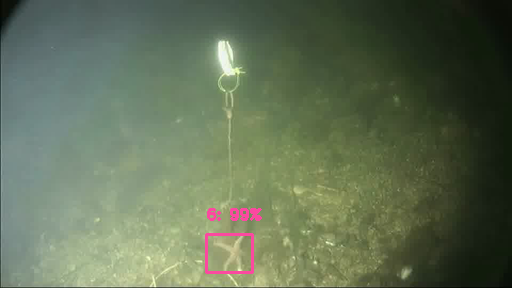

In [19]:
#@title Run object detection and show the detection results

# URL 1 - https://dl3.pushbulletusercontent.com/J7QeceVyDpTitBKvJST7wN26CkK7sSM0/11989.jpg
# URL 2 - https://dl3.pushbulletusercontent.com/bhl431EALpjXmtIPIK4Afj3PzPJ3wGN0/11308.jpg
# URL 3 - https://dl3.pushbulletusercontent.com/SSVGgz1bxcbSjyvnlyrCtbR8KzzNqqFl/1153.jpg

INPUT_IMAGE_URL = "https://dl3.pushbulletusercontent.com/SSVGgz1bxcbSjyvnlyrCtbR8KzzNqqFl/1153.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.3 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)

In [24]:

import os
import random

# Set the path to the folder containing the images
folder_path = 'test'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter the list to only include files with the .jpg extension
jpg_list = [file for file in file_list if file.endswith('.jpg')]

# Pick 10 random images from the list
random_images = random.sample(jpg_list, 10)

# Print the list of selected images
print(random_images)




['2228_jpg.rf.93b021f6f9576d559274ba8a10e392f2.jpg', '6520_jpg.rf.5b777b79ecbac27aa0ef8d17c8e6f1f8.jpg', '1919_jpg.rf.dbd94eb11adf06c83ccb514eb74e733d.jpg', '14357_jpg.rf.613ad7d97a577f547f757aa43a4f71a9.jpg', '10652_jpg.rf.40da00eabc5a6fda255d1b4a29156d7b.jpg', '10399_jpg.rf.46d37bbaa1b360403534da4b528a8aac.jpg', '5142_jpg.rf.8ce386b27d4e0f367cdbf2faedfb1775.jpg', '4629_jpg.rf.c908dce5d53ff896b5d850ab17e2f0be.jpg', '1087_jpg.rf.3eff0e5b2f44000832979cdfb240c94e.jpg', '3503_jpg.rf.e55b54c3968096e40536b2d744ad250c.jpg']


In [25]:
import time
for eachimage in random_images:
  eachimage = "test/"+eachimage
  im = Image.open(eachimage)
  im.thumbnail((512, 512), Image.ANTIALIAS)
  im.save(eachimage, 'PNG')

  # Load the TFLite model
  interpreter = tf.lite.Interpreter(model_path=model_path)
  interpreter.allocate_tensors()

  # Run inference and draw detection result on the local copy of the original file
  detection_result_image = run_odt_and_draw_results(
      eachimage,
      interpreter,
      threshold=DETECTION_THRESHOLD
  )

  # Show the detection result
  im = Image.fromarray(detection_result_image)
  im.save("predicted"+str(time.time())+".jpg")

/tmp/ipykernel_24496/2856331853.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail((512, 512), Image.ANTIALIAS)


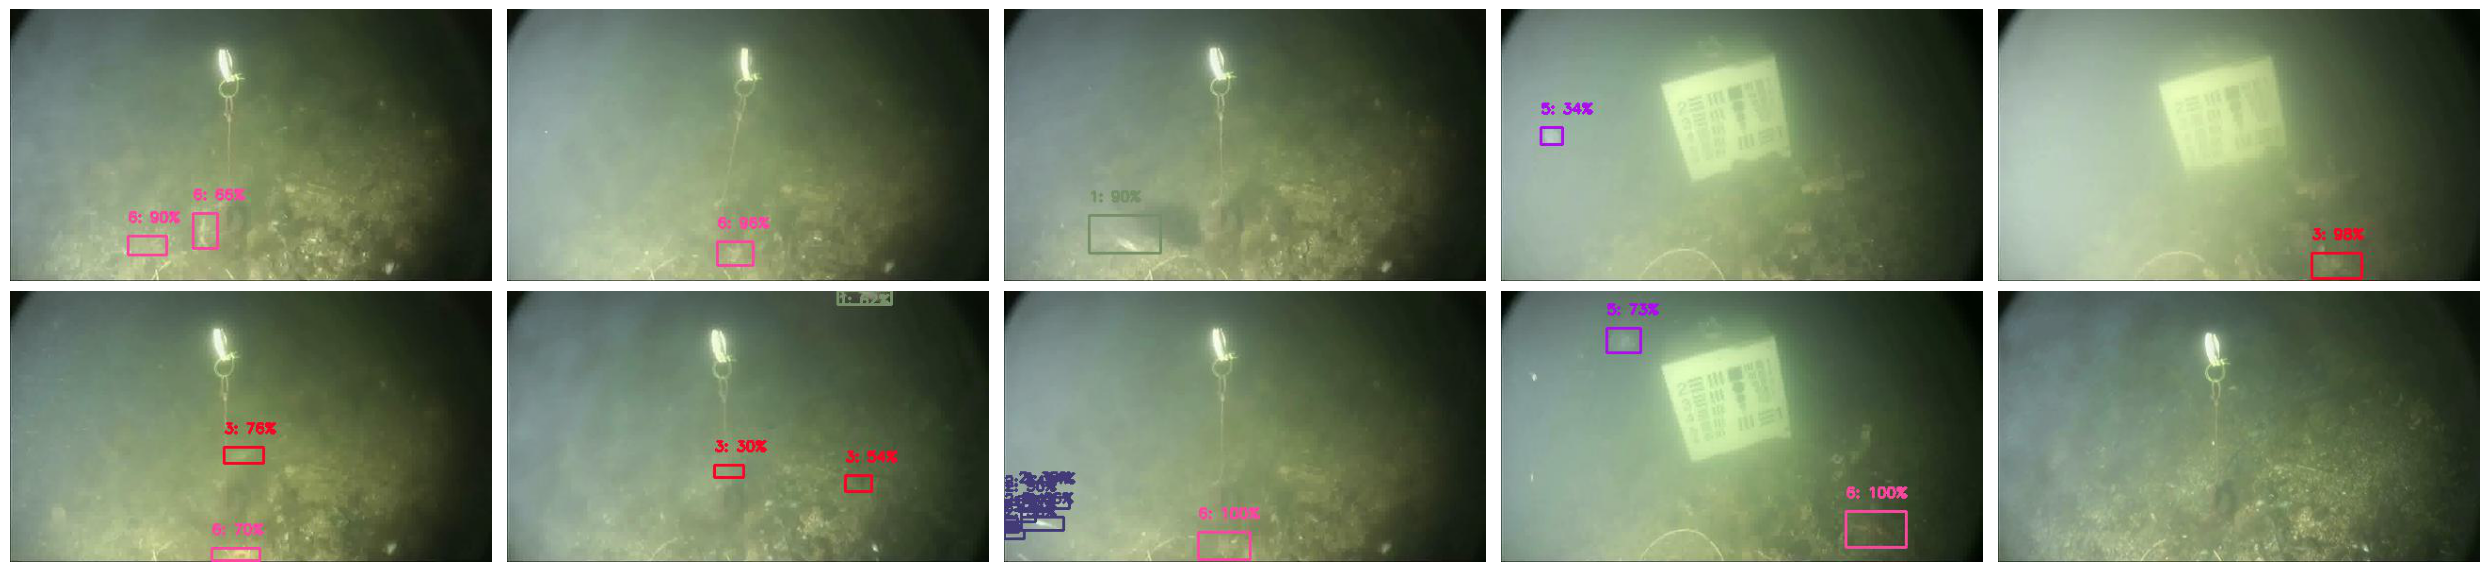

In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the number of rows and columns in the grid
nrows = 2
ncols = 5

# Get a list of all files in the current directory
file_list = os.listdir()

# Filter the list to only include files with the .jpg extension
jpg_list = [file for file in file_list if file.endswith('.jpg')]

# Set the figure size and create a new figure
fig = plt.figure(figsize=(25, 6))

# Iterate over each image and display it in the grid
for i, file in enumerate(jpg_list):
    # Load the image and add it to the figure subplot
    img = Image.open(file)
    fig.add_subplot(nrows, ncols, i+1)
    plt.imshow(img)
    plt.axis('off')

# Show the grid of images
plt.tight_layout()
plt.show()
